In [1]:
import os
import glob
import pickle
import yaml
import pandas as pd
import numpy as np
import scipy.sparse
from joblib import dump, load
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score


In [2]:
    path_to_yaml = "../../config.yaml"
    try:
        with open(path_to_yaml, "r") as file:
            config = yaml.safe_load(file)
    except Exception as e:
        print("Error reading the config file")


In [5]:
    X_train = scipy.sparse.load_npz( '../../' + config['model_trainer']['X_train_path'])[0:100]
    y_train = pd.read_parquet( '../../' + config['model_trainer']['y_train_path']).reset_index(drop=True).head(100)

In [ ]:
param_grid = {'C': [0.001, 0.01], 
              "class_weight": ['balanced'],
              "dual" : [True]
                    } 

grid = GridSearchCV(LinearSVC(), param_grid, verbose = 3,cv=2, scoring='balanced_accuracy' , n_jobs=7, return_train_score=True)


In [ ]:
grid.fit(X_train, y_train.values.ravel())

In [ ]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

In [7]:
model = LinearSVC()

model.fit(X_train,y_train.values.ravel())

LinearSVC()

In [9]:
    X_test = scipy.sparse.load_npz('/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/data/preprocessed/X_test.npz')
    y_test = pd.read_parquet('/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/data/preprocessed/y_test.parquet').reset_index(drop=True)


0.4589261884542729
0.11738607175841517


In [10]:
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test.values.ravel(), y_pred))
    print(balanced_accuracy_score(y_test.values.ravel(), y_pred))  


0.4589261884542729
0.11738607175841517


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test.values.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63    104295
           1       0.78      0.03      0.06     41731
           2       0.72      0.03      0.05     23251
           3       0.00      0.00      0.00     21781
           4       0.00      0.00      0.00     12727
           5       0.00      0.00      0.00     17311
           6       0.00      0.00      0.00      6456
           7       0.00      0.00      0.00      3194
           8       0.00      0.00      0.00        58

    accuracy                           0.46    230804
   macro avg       0.22      0.12      0.08    230804
weighted avg       0.42      0.46      0.30    230804



/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [14]:
y_test

,complaint_category_id
0,0
1,7
2,0
3,1
4,2
...,...
230799,0
230800,1
230801,0
230802,0


In [15]:
from sklearn.metrics import confusion_matrix


In [16]:
cm = confusion_matrix(y_test, y_pred)


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

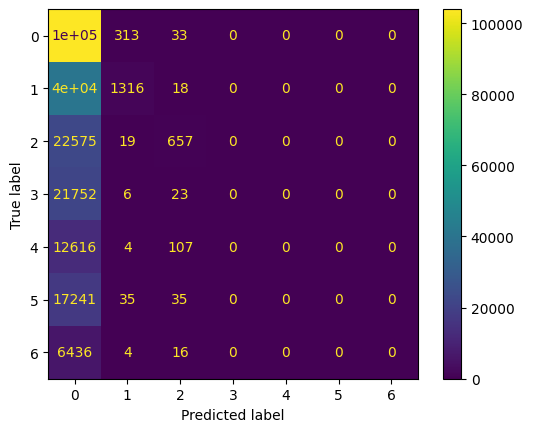

In [22]:
import matplotlib.pyplot as plt
disp.plot()

plt.show()


In [23]:
confusion_matrix(y_test, y_pred)

array([[103949,    313,     33,      0,      0,      0,      0,      0,
             0],
       [ 40397,   1316,     18,      0,      0,      0,      0,      0,
             0],
       [ 22575,     19,    657,      0,      0,      0,      0,      0,
             0],
       [ 21752,      6,     23,      0,      0,      0,      0,      0,
             0],
       [ 12616,      4,    107,      0,      0,      0,      0,      0,
             0],
       [ 17241,     35,     35,      0,      0,      0,      0,      0,
             0],
       [  6436,      4,     16,      0,      0,      0,      0,      0,
             0],
       [  3169,      0,     25,      0,      0,      0,      0,      0,
             0],
       [    57,      1,      0,      0,      0,      0,      0,      0,
             0]])

In [27]:
y_test.value_counts().sort_index()

complaint_category_id
0                        104295
1                         41731
2                         23251
3                         21781
4                         12727
5                         17311
6                          6456
7                          3194
8                            58
Name: count, dtype: int64

In [33]:
report = classification_report(y_test.values.ravel(), y_pred,output_dict=True)

/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/piyush/Desktop/dsml_Portfolio/consumer_complaint/virtualenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [35]:
df = pd.DataFrame(report).transpose()

In [36]:
df

,precision,recall,f1-score,support
0,0.455533,0.996682,0.625282,104295.000000
1,0.775029,0.031535,0.060605,41731.000000
2,0.718818,0.028257,0.054376,23251.000000
3,0.000000,0.000000,0.000000,21781.000000
4,0.000000,0.000000,0.000000,12727.000000
5,0.000000,0.000000,0.000000,17311.000000
6,0.000000,0.000000,0.000000,6456.000000
7,0.000000,0.000000,0.000000,3194.000000
8,0.000000,0.000000,0.000000,58.000000
accuracy,0.458926,0.458926,0.458926,0.458926


In [37]:
print(aa)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63    104295
           1       0.78      0.03      0.06     41731
           2       0.72      0.03      0.05     23251
           3       0.00      0.00      0.00     21781
           4       0.00      0.00      0.00     12727
           5       0.00      0.00      0.00     17311
           6       0.00      0.00      0.00      6456
           7       0.00      0.00      0.00      3194
           8       0.00      0.00      0.00        58

    accuracy                           0.46    230804
   macro avg       0.22      0.12      0.08    230804
weighted avg       0.42      0.46      0.30    230804

